In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os
import seaborn as sns
from scipy.stats import binned_statistic
import matplotlib
import matplotlib.backends.backend_pdf
from scipy.stats import chi2, binned_statistic
from cosmic_calc import * 
from scipy.optimize import curve_fit
from bisect import bisect
from datetime import datetime
from scipy.optimize import curve_fit
from statsmodels.stats.weightstats import DescrStatsW

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [5]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats_new/'

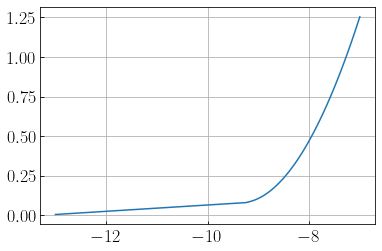

In [3]:
ssfr_list = np.linspace(-13,-7,100)
corr = []
for ssfr in ssfr_list:
    if ssfr<=-9.23:
        corr.append(0.02*ssfr+0.264)
    else:
        corr.append(0.21*ssfr**2+3.9344*ssfr+18.505)

plt.plot(ssfr_list,corr)
plt.grid()

In [7]:
cat_name = 'COSMOS_deep'
phot_config='nonir'

if cat_name != 'XMM-LSS_deep':
    cat = Table.read(graham_output_dir+'pcat_'+cat_name+'_cat_out_nomaglimit_'+phot_config+'_il_nz_prior_formass_sfq_added.fits')
    cat = cat[cat['inside_u'] == True]
else:
    cat = Table.read(graham_output_dir+'pcat_XMM-LSS_deep_cat_out_nomaglimit_noirac_il_nz_prior_formass_sfq_added.fits')
    cat = cat[cat['inside_uS_deep'] == True]
    cat = cat[cat['inside_j'] == True]

In [31]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
 
# create data
df = pd.DataFrame({
   'x': np.random.normal(size=10000),
   'y': np.random.normal(size=10000)
})
df.head()

,x,y
0,-0.740750,0.846969
1,0.705435,1.880912
2,0.209855,-0.854734
3,0.103597,-1.753559
4,1.268013,1.542953


In [34]:
# Init values and parameters
nbins = 300
x = df['x'] # change 'x' with your column name
y = df['y'] # change 'y' with your column name

k = gaussian_kde([x,y])
xi, yi = np.mgrid[
   x.min():x.max():nbins*1j,
   y.min():y.max():nbins*1j
]
zi = k(np.vstack([
   xi.flatten(),
   yi.flatten()
])).reshape(xi.shape)

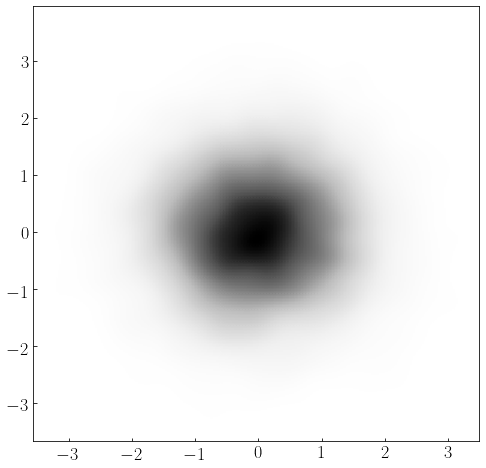

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(xi, yi, zi,cmap='Greys')
plt.show()